In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path = "/home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/"
categories = os.listdir(dataset_path)
categories = sorted(categories)
label_mapping = {category: label for label, category in enumerate(categories)}

print(categories)
print("Label Mapping:", label_mapping)

['ashfaq', 'khalid', 'rifat', 'shafin']
Label Mapping: {'ashfaq': 0, 'khalid': 1, 'rifat': 2, 'shafin': 3}


In [3]:
# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

images = []
labels = []

# Define padding percentage
padding_ratio = 0.2

for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = label_mapping[category]

    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)

        try:
            image = cv2.imread(file_path)

            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Detect faces
                gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
                faces = face_cascade.detectMultiScale(gray, 1.1, 4)

                if len(faces) > 0:
                    for x, y, w, h in faces:
                        # Calculate padding
                        pad_x = int(w * padding_ratio)
                        pad_y = int(h * padding_ratio)

                        # Expand the bounding box with padding
                        x1 = max(x - pad_x, 0)
                        y1 = max(y - pad_y, 0)
                        x2 = min(x + w + pad_x, image.shape[1])
                        y2 = min(y + h + pad_y, image.shape[0])

                        # Crop the padded face region
                        face_image = image[y1:y2, x1:x2]
                        face_image = cv2.resize(face_image, (256, 256))
                        images.append(face_image)
                        labels.append(label)
                else:
                    print(f"No face detected in {file_path}")
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")


images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/0752.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/ashfaq_0961.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/0899.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/ashfaq_1018.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/ashfaq_0402.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/0750.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/ashfaq_1019.png
No face detected in /home/khalid/Academic/8th Semester/CVPR/Project/face_recognition_dataset/train/ashfaq/ashfaq_0978.png
No face detected in /home/khalid/Academic/8th

In [4]:
from sklearn.model_selection import train_test_split

train_imgs, test_imgs, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

data = [(train_imgs, train_labels), (test_imgs, test_labels)]

print(f"Training data shape: {np.array(train_imgs).shape}, {np.array(train_labels).shape}")
print(f"Testing data shape: {np.array(test_imgs).shape}, {np.array(test_labels).shape}")

Training data shape: (5728, 256, 256, 3), (5728,)
Testing data shape: (1432, 256, 256, 3), (1432,)


In [5]:
# Count occurrences of each class in the training data
unique_train, counts_train = np.unique(train_labels, return_counts=True)
print("Training class distribution:")
for label, count in zip(unique_train, counts_train):
    print(f"Class {label}: {count} samples")

# Count occurrences of each class in the testing data
unique_test, counts_test = np.unique(test_labels, return_counts=True)
print("\nTesting class distribution:")
for label, count in zip(unique_test, counts_test):
    print(f"Class {label}: {count} samples")

Training class distribution:
Class 0: 1463 samples
Class 1: 1405 samples
Class 2: 1340 samples
Class 3: 1520 samples

Testing class distribution:
Class 0: 386 samples
Class 1: 325 samples
Class 2: 326 samples
Class 3: 395 samples


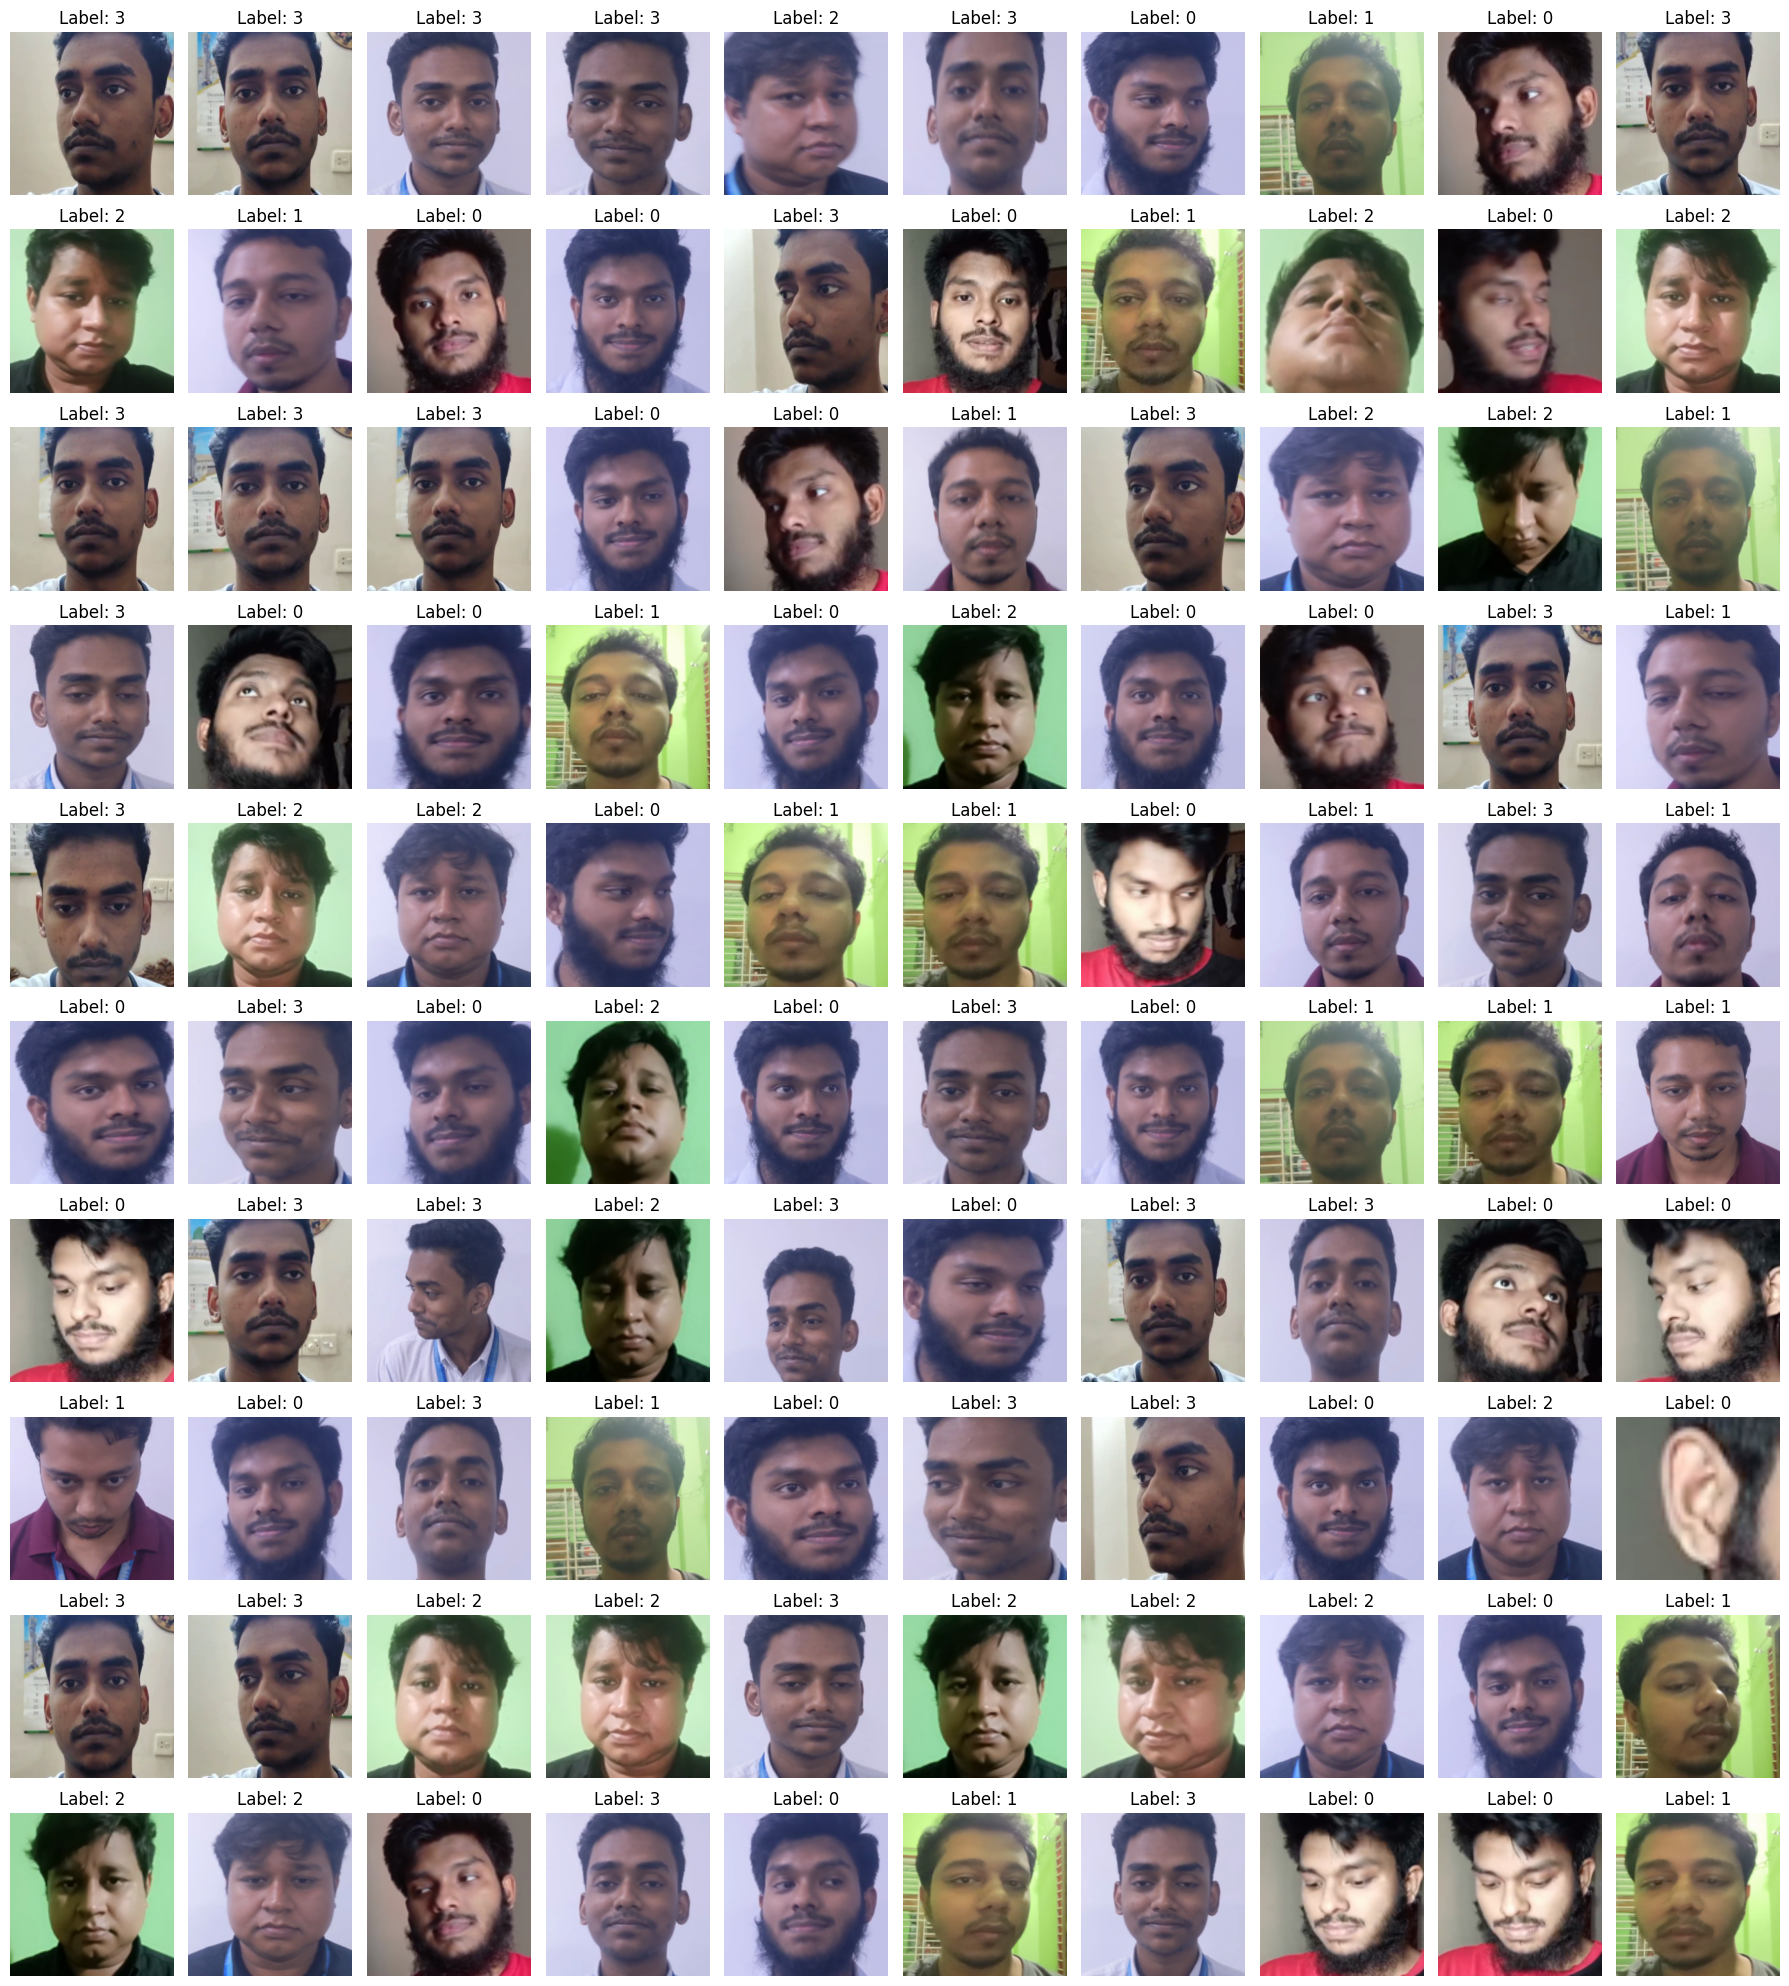

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(18, 20))

for img_array, label, ax in zip(train_imgs, train_labels, axes.flat):
    ax.imshow(img_array, cmap="gray")  
    ax.set_title(f"Label: {label}")   
    ax.axis('off')                     

plt.tight_layout()
plt.show()

In [6]:
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

print("Data has been pickled successfully!")

Data has been pickled successfully!
